In [493]:
#!pip install tensorflow==1.15
import tensorflow.compat.v2 as tf
#!pip install pydot
#!pip install graphviz 
#!pip install mlxtend
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import matplotlib
import keras
import sys
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

In [494]:
df = pd.read_csv('Deep.csv')

In [495]:
df.head()

,X1,X2,Y
0,-3.980,-0.120,1
1,-3.464,-2.110,1
2,-3.461,1.890,1
3,-2.220,-3.474,1
4,-2.020,0.030,0


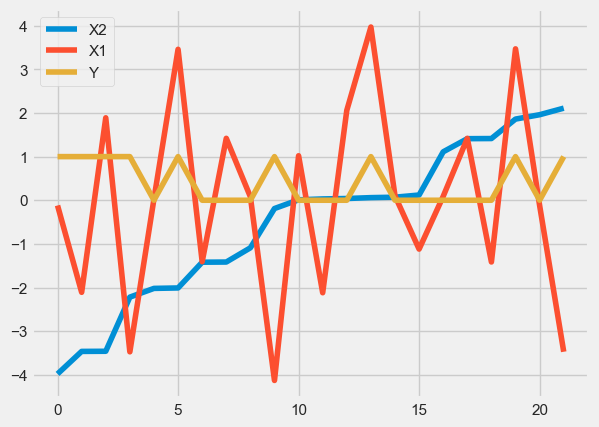

In [496]:
plt.plot(df,label='Inline label')
plt.legend(["X2","X1","Y"])

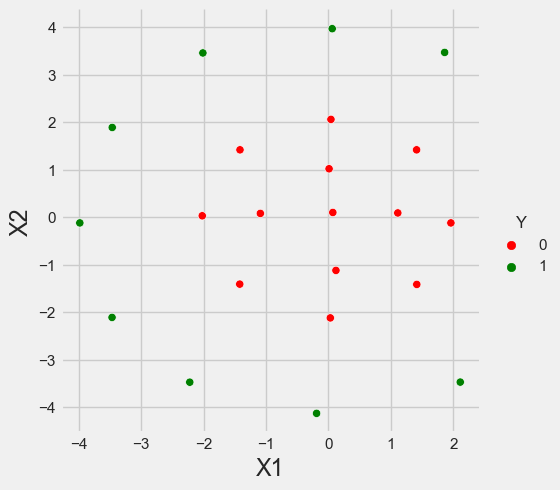

In [497]:
sns.pairplot(
    x_vars = ["X1"],
    y_vars = ["X2"],
    data = df,
    hue = "Y",
    height = 5,
    palette = {0:"red", 1:"green"}
)

Perceptron model do not accept the above format of the data. Let us convert it into the proper format.

In [498]:
X = [[-3.98,-0.12], [-3.464,-2.11], [-3.461,1.89], [-2.22,-3.474],[-2.02,0.03],[-2.01,3.459],[-1.42,-1.409],[-1.416,1.419],[-1.09,0.08
],[-0.19,-4.13],[0.01,1.02],[0.03,-2.12],[0.04,2.06],[0.06,3.97],[0.07,0.1],[0.12,-1.12],[1.11,0.09],[1.411,1.419],[1.414,-1.415],[1.86,3.47],[1.96,-0.12],[2.11,-3.472]]
y = [1, 1, 1, 1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1]

In [499]:
def step_function(x):
    """Step function
    
    Returns 1 if x >= 0
    Returns 0 if x < 0
    
    """
    if x >= 0: return 1
    return 0

assert(step_function(1) == 1)
assert(step_function(0) == 1)
assert(step_function(-5) == 0)

In [500]:
def prediction(X, W, b):
    """Prediction function
    
    W = (w1, w2), X = (x1, x2), b
    """
    product = np.matmul(X, W) + b
    return step_function(product[0])

prediction(
    [[0.5, 0.8], [0.3, 0.2]],
    [[-0.2], [0.5]],
    [[-0.9]]
)

0

In [501]:
def perceptron_step(X, y, W, b, learning_rate):
    for i in range(len(X)):
        point = X[i]
        pred = prediction(point, W, b)
        if y[i] - pred == 1: # y[i] = 1, pred = 0
            W[0] += point[0] * learning_rate
            W[1] += point[1] * learning_rate
            b += learning_rate
        elif y[i] - pred == -1: # y[i] = 0, pred = 1
            W[0] -= point[0] * learning_rate
            W[1] -= point[1] * learning_rate
            b -= learning_rate
    return W, b

In [502]:
def train_perceptron(X, y, learning_rate = 0.01, epochs = 25):
    W = np.random.rand(2, 1) # [[w1], [w2]]
    b = np.random.rand(1)
    
    lines = []
    for _ in range(epochs):
        W, b = perceptron_step(X, y, W, b, learning_rate)
        lines.append((-W[0] / W[1], -b / W[1]))
        
    return lines

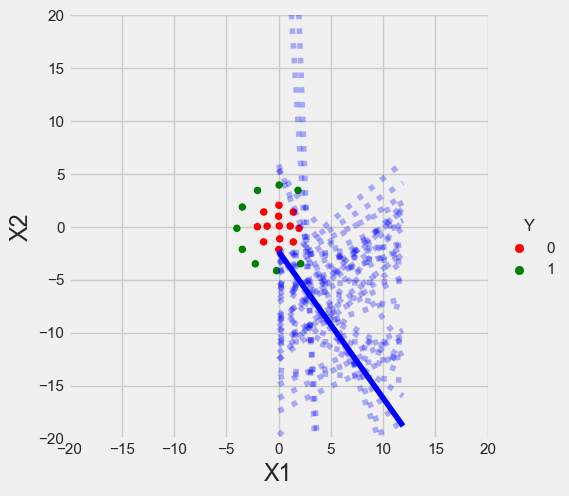

In [503]:
np.random.seed(43)
g = sns.pairplot(
    x_vars = ["X1"],
    y_vars = ["X2"],
    data = df,
    hue = "Y",
    height = 5,
    palette = {0:"red", 1:"green"}
)

# Add Labels, axes (same as before)
g.set(
    xlim = (-20,20),
    ylim = (-20,20),
    xlabel="X1",
    ylabel="X2"
)

# Train Perceptron
lines = train_perceptron(X, y, epochs=50)
lines


# Draw all the lines
lines_draw = []
for line in lines:
    x_points = np.arange(0, 12, 0.1)
    y_points = line[0][0] * x_points + line[1][0] * 10
    lines_draw.append((x_points, y_points))

for line in lines_draw[:-1]:
    plt.plot(line[0], line[1], linestyle=':', color='blue', alpha=0.3)
    
# Draw the final line
last = lines_draw[-1]
plt.plot(last[0], last[1], linestyle='-', color='blue')

In [504]:
weights = train_perceptron(X, y, epochs=50)
weights

[(array([-0.61218681]), array([-3.36663166])),
 (array([-0.46917845]), array([-3.82598737])),
 (array([-0.41137032]), array([-3.92960059])),
 (array([-0.31384564]), array([-4.10440037])),
 (array([-0.11425608]), array([-4.46213759])),
 (array([-0.14054144]), array([-7.0529193])),
 (array([2.32685538]), array([6.12129516])),
 (array([0.55524535]), array([-0.66081359])),
 (array([-4.43227678]), array([1.59530328])),
 (array([-2.68877702]), array([0.08215111])),
 (array([-1.66702914]), array([0.06906119])),
 (array([-95.37818962]), array([37.57927927])),
 (array([0.60423107]), array([-0.9767614])),
 (array([0.10343042]), array([-1.45982939])),
 (array([-4.96027687]), array([0.15886907])),
 (array([-2.99044871]), array([0.10623268])),
 (array([0.85648778]), array([-1.80683859])),
 (array([0.64579024]), array([-0.81667203])),
 (array([0.27436184]), array([-1.12904813])),
 (array([-0.55721446]), array([-1.82841459])),
 (array([-5.2939426]), array([0.22350261])),
 (array([5.67974099]), array(

# From above we can say :-
A single-layer perceptron works only if the dataset is linearly separable.
The algorithm is used only for Binary Classification problems. However, we can extend the algorithm to solve a multiclass classification problem by introducing one perceptron per class. i.e., each perceptron results in a 0 or 1 signifying whether or not the sample belongs to that class

# Q2. Train a neural network
Let us design a neural network to classify the Pima Indians Diabetes Dataset.
1. Implement a single hidden layer MLP. The final output layer will have 3
neurons, one for each result. Arch: [Input, hidden, output]
2. Now use a NN with three hidden layers. The first hidden layer has 8
neurons. The second hidden layer has 4 neurons. The third hidden layer
has 4 neurons. Arch: [Input,hidden1(8),hidden2(4),hidden3(4),output]
(i) Use Keras or any other framework to design the NN model and train on
the diabetes data. Report the accuracy.
(ii) Draw the schematic diagram of the NN along with all the weights and
specify a suitable activation function.


# importing diabetes Dataset

In [505]:
df = pd.read_csv('diabetes.csv')

In [506]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [508]:
# print the shape of the DataFrame, so we can see how many examples we have
print( 'Shape of DataFrame: {}'.format(df.shape))
print (df.loc[1])

Shape of DataFrame: (768, 9)
Pregnancies                  1.000
Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Outcome                      0.000
Name: 1, dtype: float64


In [509]:
# print the last twenty or so data points
df.loc[748:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
748,3,187,70,22,200,36.4,0.408,36,1
749,6,162,62,0,0,24.3,0.178,50,1
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0
757,0,123,72,0,0,36.3,0.258,52,1


In [510]:
# remove missing data (indicated with a "?")
data = df[~df.isin(['?'])]
data.loc[1:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [511]:
# drop rows with NaN values from DataFrame
data = data.dropna(axis=0)
data.loc[1:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [512]:
# print the shape and data type of the dataframe
print(data.shape)
print(data.dtypes)

(768, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [513]:
# transform data to numeric to enable further analysis
data = data.apply(pd.to_numeric)
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [514]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Histograms for each variable

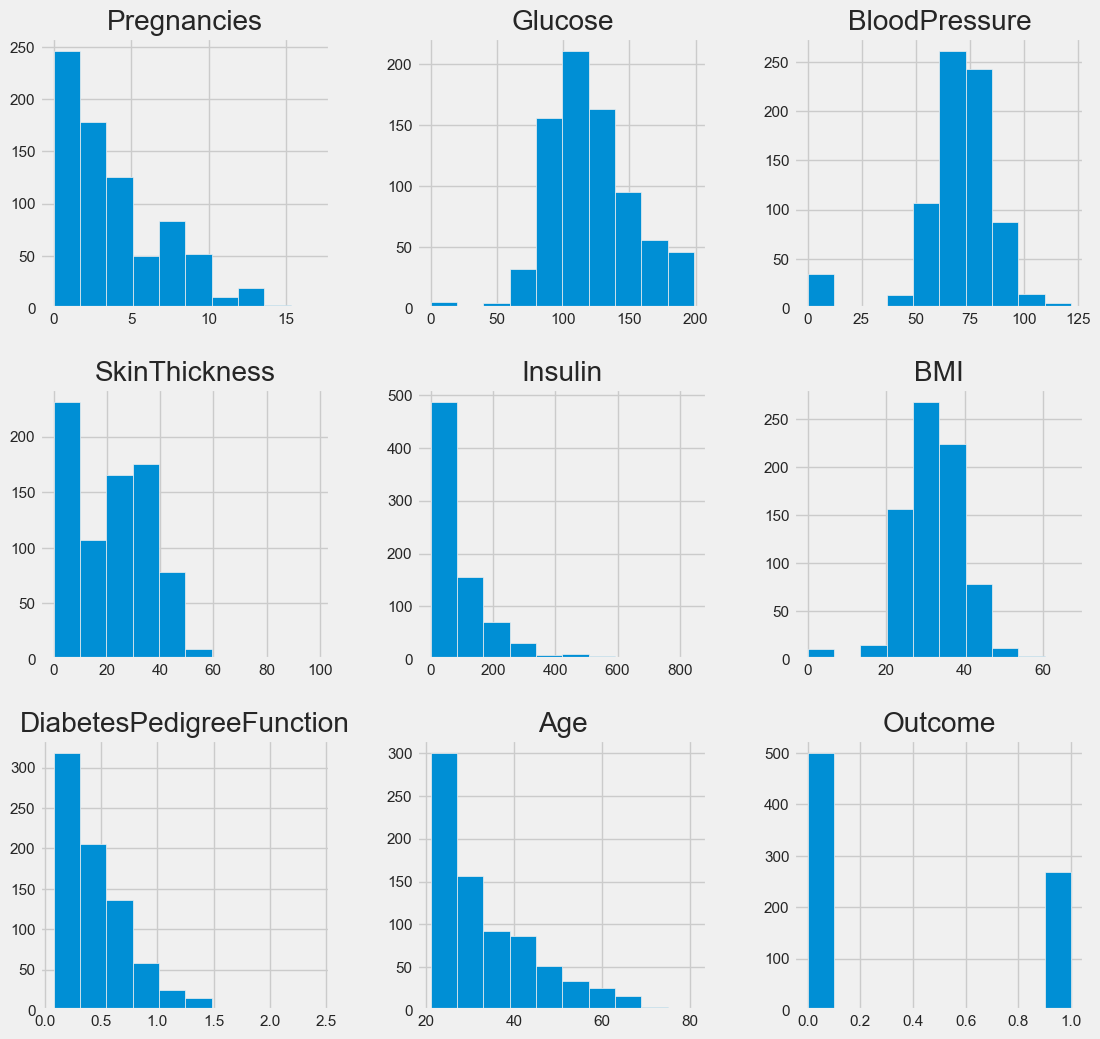

In [515]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

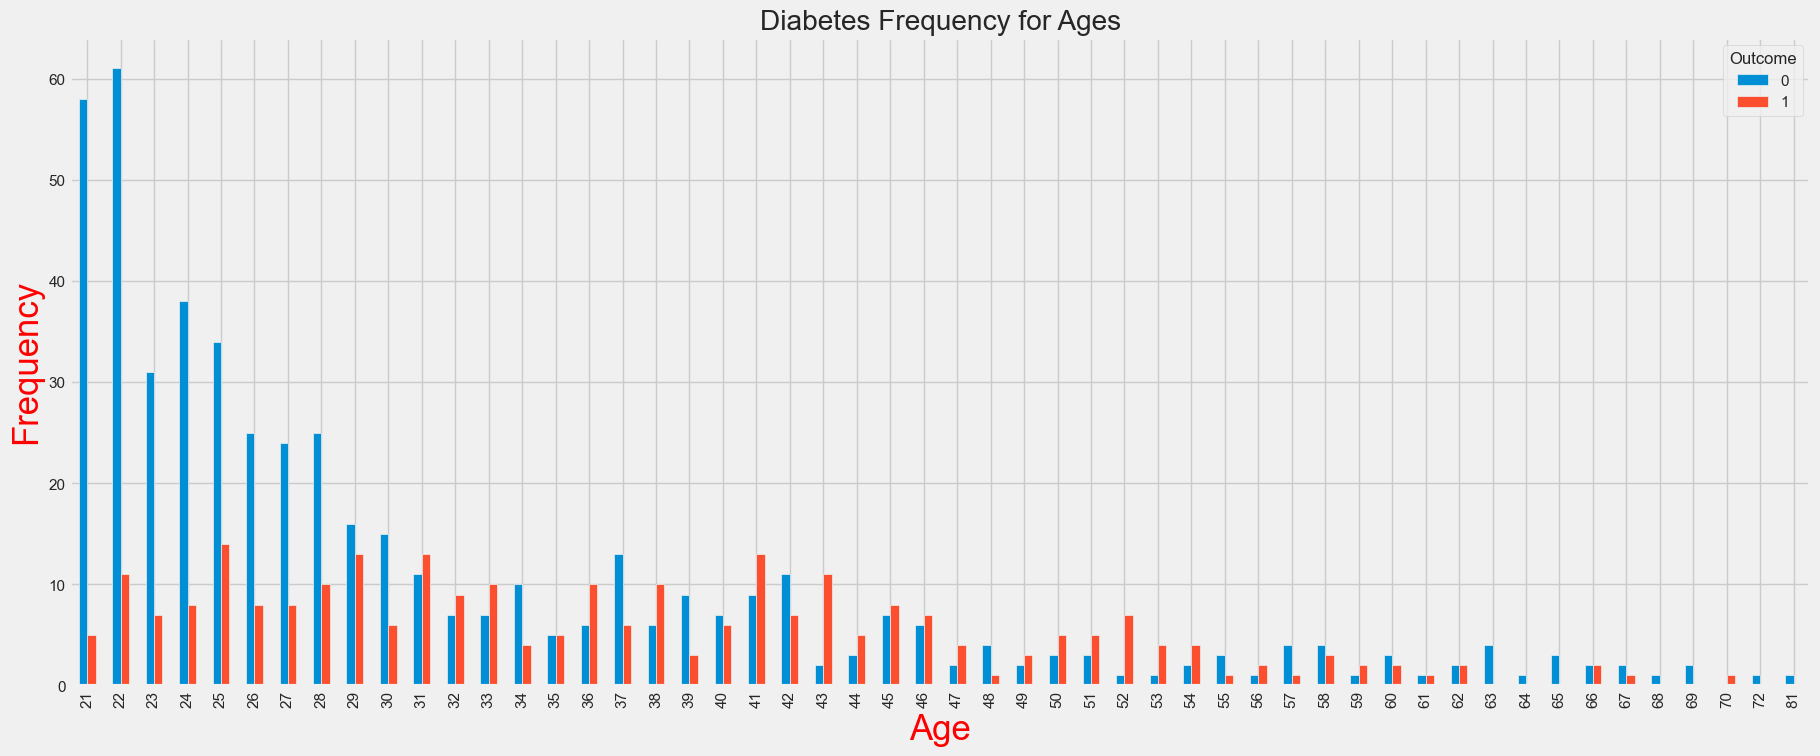

In [516]:
pd.crosstab(data.Age,data.Outcome).plot(kind="bar",figsize=(20,8))
plt.title('Diabetes Frequency for Ages')
plt.xlabel('Age',color='red',size=25)
plt.ylabel('Frequency',color='red',size=25)
plt.show()

# Heatmap for each variable

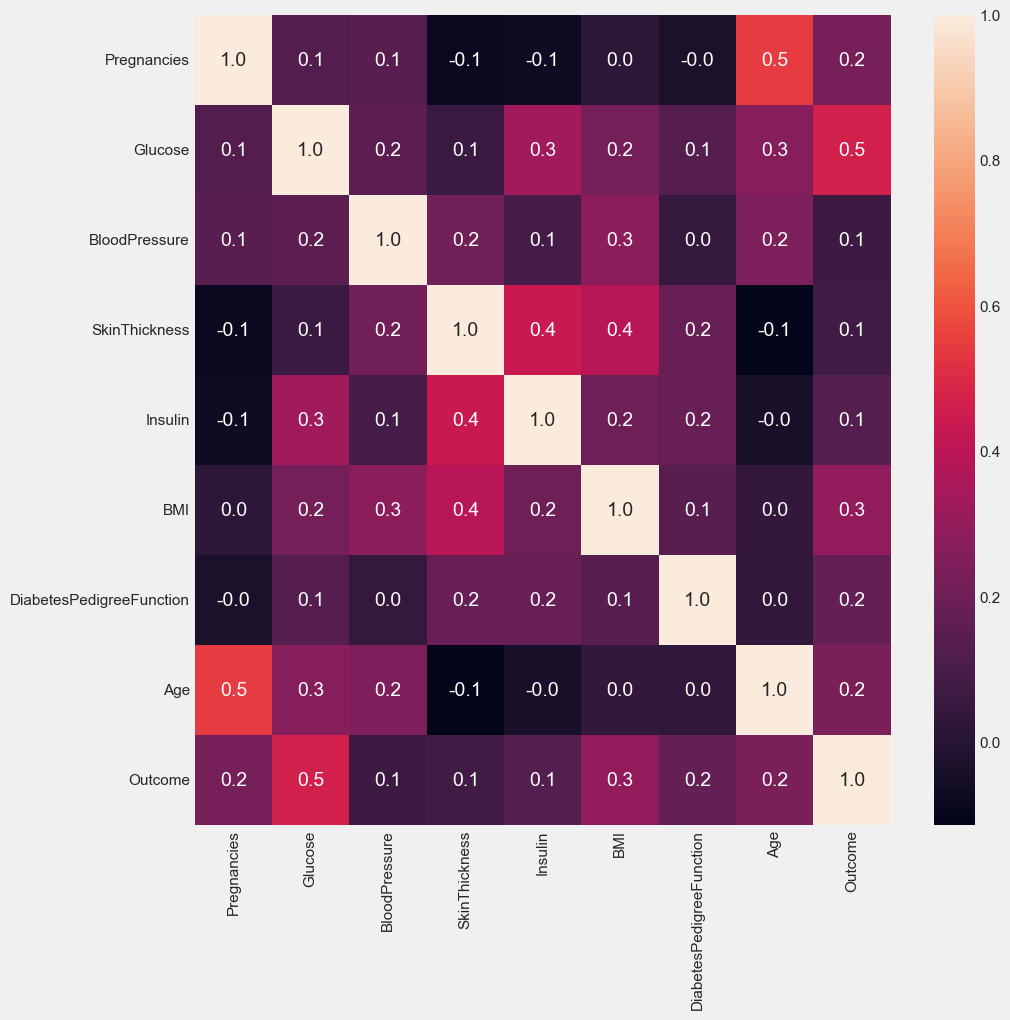

In [517]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

# Age vs DiabetesPedigreeFunction

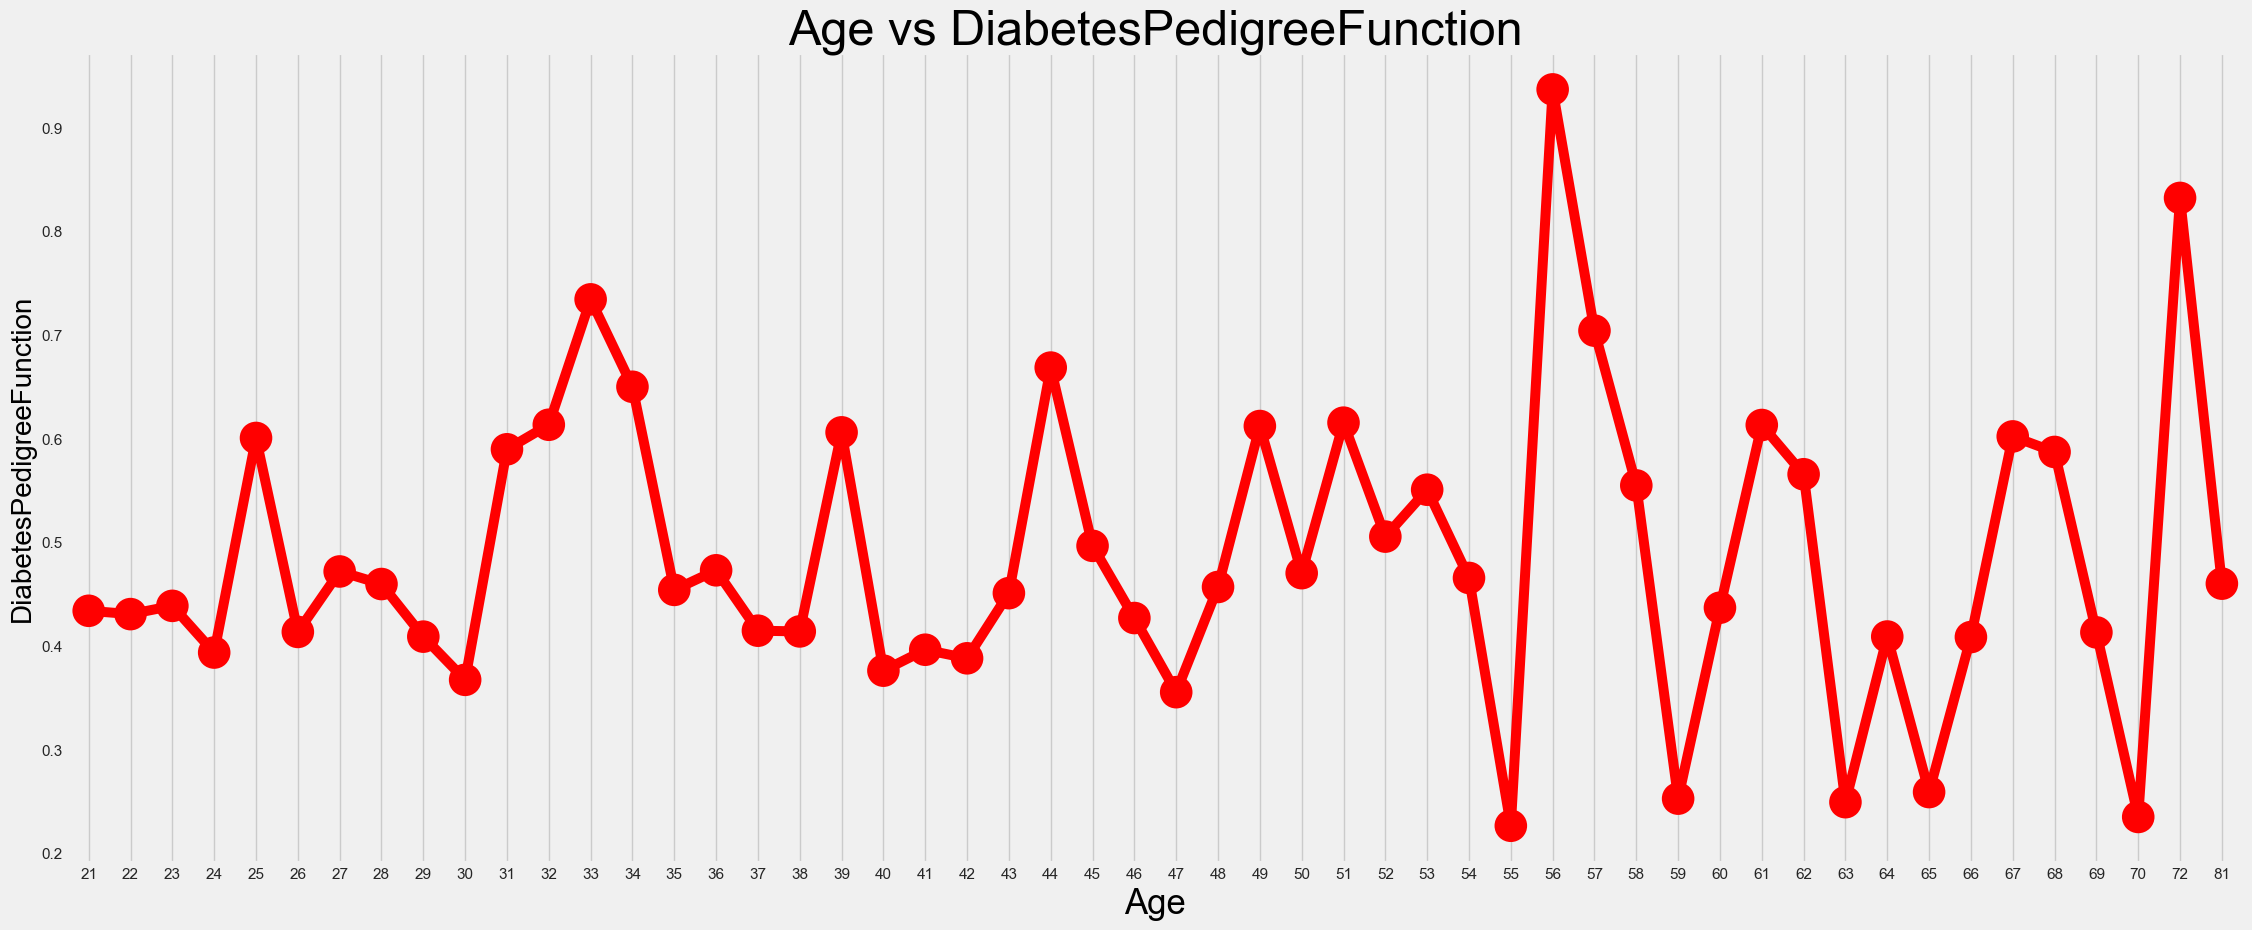

In [518]:
age_unique=sorted(data.Age.unique())
age_DiabetesPedigreeFunction_values=data.groupby('Age')['DiabetesPedigreeFunction'].count().values
mean_DiabetesPedigreeFunction=[]
for i,Age in enumerate(age_unique):
    mean_DiabetesPedigreeFunction.append(sum(data[data['Age']==Age].DiabetesPedigreeFunction)/age_DiabetesPedigreeFunction_values[i])
    
plt.figure(figsize=(25,10))
sns.pointplot(x=age_unique,y=mean_DiabetesPedigreeFunction,color='red',alpha=0.9)
plt.xlabel('Age',fontsize = 25,color='black')

plt.ylabel('DiabetesPedigreeFunction',fontsize = 20,color='black')
plt.title('Age vs DiabetesPedigreeFunction',fontsize = 35,color='black')
plt.grid()
plt.show()

# Create Training and Testing Datasets

Now that we have preprocessed the data appropriately, we can split it into training and testings datasets. We will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data).

In [519]:
X = np.array(data.drop(['Outcome'],1))
y = np.array(data['Outcome'])

C:\Users\Shilpi\AppData\Local\Temp\ipykernel_8532\482882832.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['Outcome'],1))


In [520]:
X[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [521]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [522]:
# create X and Y datasets for training
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.75)

In [523]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:768])

(192, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 

# Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. Using keras, we will define a simple neural network with one hidden layer. Since this is a categorical classification problem, we will use a softmax activation function in the final layer of our network and a categorical_crossentropy loss during our training phase.

# 1. Implement a single hidden layer MLP. The final output layer will have 3
# neurons, one for each result. Arch: [Input, hidden, output]

In [524]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(1,3),max_iter=500, activation='relu')
mlp

MLPClassifier(hidden_layer_sizes=(1, 3), max_iter=500)

In [525]:
a=mlp.fit(X_train,y_train)
pred=mlp.predict(X_test)
pred

C:\Users\Shilpi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,

In [526]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,pred)


array([[294,  81],
       [ 97, 104]], dtype=int64)

In [527]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       375
           1       0.56      0.52      0.54       201

    accuracy                           0.69       576
   macro avg       0.66      0.65      0.65       576
weighted avg       0.69      0.69      0.69       576



# 2. Now use a NN with three hidden layers. The first hidden layer has 8
# neurons. The second hidden layer has 4 neurons. The third hidden layer
# has 4 neurons. Arch: [Input,hidden1(8),hidden2(4),hidden3(4),output]
# (i) Use Keras or any other framework to design the NN model and train on
# the diabetes data. Report the accuracy

# Network arhitecture¶
3 hidden layers. The first hidden layer has 8 neurons. The second hidden layer has 4 neurons. The third hidden layer
has 4 neurons. Arch: [Input,hidden1(8),hidden2(4),hidden3(4),output]
Output layer with sigmoid activation.

In [528]:
X = df.drop('Outcome', axis =1).values
y = df.Outcome.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=2)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

In [529]:
def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(8, input_dim=8, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(4, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(4, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [530]:
model = nn()
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 8)                 72        
                                                                 
 BC1 (BatchNormalization)    (None, 8)                 32        
                                                                 
 Activation1 (Activation)    (None, 8)                 0         
                                                                 
 Dropout1 (Dropout)          (None, 8)                 0         
                                                                 
 FC2 (Dense)                 (None, 4)                 36        
                                                                 
 BC2 (BatchNormalization)    (None, 4)                 16 

# Compile and fit the model

In [531]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Define callbacks.

In [532]:
reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)

In [533]:
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_dev, y_dev), callbacks=[reduce_lr, early_stopping], verbose=0)

# Metrics

In [534]:
x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    

17/17 [==============================] - 0s 2ms/step
Training set:
	Accuracy:0.642
	Classification Report
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       345
           1       0.00      0.00      0.00       192

    accuracy                           0.64       537
   macro avg       0.32      0.50      0.39       537
weighted avg       0.41      0.64      0.50       537

4/4 [==============================] - 0s 2ms/step
Dev set:
	Accuracy:0.713
	Classification Report
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        82
           1       0.00      0.00      0.00        33

    accuracy                           0.71       115
   macro avg       0.36      0.50      0.42       115
weighted avg       0.51      0.71      0.59       115

4/4 [==============================] - 0s 2ms/step
Test set:
	Accuracy:0.629
	Classification Report
              precision    recall  f1-sco

C:\Users\Shilpi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shilpi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shilpi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shilpi\anaconda3\lib\site-packages\sklearn\

The classifier showed good performance while predicting the positive cases in both validation and test set.
A different architecture or a completely different class of algorithms could be used to gain a performance boost.

!pip install keras_sequential_ascii
from keras_sequential_ascii import keras2ascii
keras2ascii(model=nn())

# (ii) Draw the schematic diagram of the NN along with all the weights and
# specify a suitable activation function.

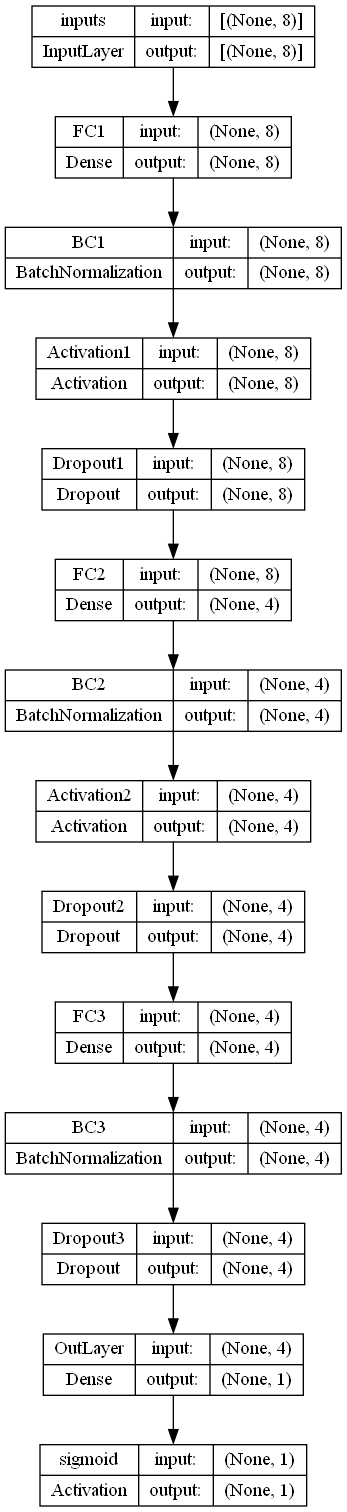

In [535]:
# Visualize Model
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)